# Project DD2434
## Run instructions
Tested in python 3.12.6, in a .venv environment

## Datasets
### Text document datasets
The original paper used 4 datsets from different newsgroups, sci.crypt, sci.med, sci.space and soc.religion.christian, which are available at `URL`

We also used `DATASET`

### Image datasets


The original paper used 13 monochromatic images of still life as the basis for the image datasets, which are unfortunately not available any longer. 




In [6]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets, transforms

In [2]:
def normalizecolumns(d):
    """
    Return a matrix where the columns have unit length
    """
    
    o = np.zeros(d.shape)
    for col in range(d.shape[1]):
        total_length = 0
        for row in range(d.shape[0]):
            total_length += d[(row,col)]**2
        
        for row in range(d.shape[0]):
            o[(row,col)] = d[(row,col)]/np.sqrt(total_length)
    return o
    
    

def RP(dataset,k):
    """
    Dataset - d x N, where d is the # of dimensions, N is the # of data points.
    Creates appropriate matrix R (k x d), to transform into a lower dimension representation
    """
    d = dataset.shape[0]
    return normalizecolumns(np.random.normal(size=(k,d)))


def SRP(dataset,k):
    d = dataset.shape[0]
    o = np.zeros((k,d))
    for row in range(k):
        for col in range(d):
            r = np.random.random()
            if r < 1/6:
                o[(row,col)] = np.sqrt(3)
            elif r > 5/6:
                o[(row,col)] = -np.sqrt(3)
    return normalizecolumns(o)

In [3]:
a = np.matrix([[1,2,3,4],[1,2,3,8],[1,2,3,8],[1,2,3,8],[1,2,3,8],[1,2,3,8],[1,2,3,8]])

print(RP(a,2) * a)


[[ -0.77003779  -1.54007558  -2.31011338 -10.10866176]
 [  2.0141367    4.02827341   6.04241011  16.75376353]]


Image size: torch.Size([64, 64])
Image path: ./tiny-imagenet-200/test/images\test_0.JPEG
torch.Size([4096, 1])
tensor([[0.3373],
        [0.3333],
        [0.3333],
        ...,
        [0.4431],
        [0.4431],
        [0.4392]])


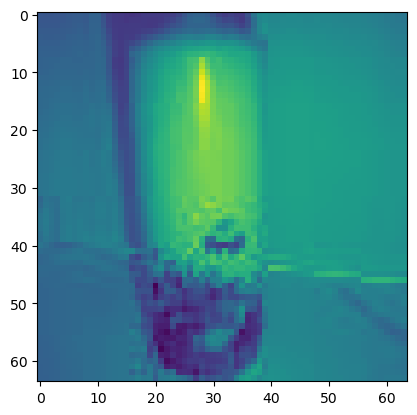

In [35]:
#from torchvision import datasets, transforms

transform = transforms.ToTensor()
#fashion_mnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
#fashion_mnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

#print(f"Training samples: {len(fashion_mnist_train)}, Test samples: {len(fashion_mnist_test)}")

from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class TinyImageNetTestDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.image_paths = [
            os.path.join(root, fname) for fname in os.listdir(root) if fname.endswith(".JPEG")
        ]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Convert to RGB
        if self.transform:
            image = self.transform(image)
        return image, img_path  # Return image and its path

# Define a transform
transform = transforms.Compose([ 
    transforms.Grayscale(num_output_channels=1), # grayscale 
    transforms.ToTensor(),          # Convert to Tensor
])

# Instantiate the dataset
test_dataset = TinyImageNetTestDataset(root='./tiny-imagenet-200/test/images', transform=transform)

# Access the first sample
image, img_path = test_dataset[0]
image = np.squeeze(image)
print("Image size:", image.shape)
print("Image path:", img_path)

im_vec = np.reshape(image, (64**2,1))

print(im_vec.shape)
print(im_vec)
plt.imshow(image)
